In [68]:
from random import randint
import numpy as np
import decimal
from sklearn import metrics
import matplotlib.pyplot as plt

In [97]:
def openreadtxt(file_name):
    data = []
    file = open(file_name,'r')  #打开文件
    file_data = file.readlines() #读取所有行
    for row in file_data:
        tmp_list = row.split(' ') #按‘，’切分每行的数据
        tmp_list[-1] = tmp_list[-1].replace('\n','') #去掉换行符
        for i in range(len(tmp_list)): #将字符串转化为浮点数
            tmp_list[i] = float(tmp_list[i])
        data.append(tmp_list) #将每行数据插入data中
    return data

def pred(x, w):
    pred_y = 0
    for i in range(len(w)):
        if(i == len(w)-1): #w[i]是偏置
            pred_y += w[i]
        else:
            pred_y += (x[i] * w[i])
        #print(pred_y)
    return pred_y

def SGD(Y, X, w, alpha):
    '''
    w: 参数 
    alpha: 学习率
    '''
    i = randint(0,len(Y)-1)
    for j in range(len(w)):
        if( j == len(w) - 1 ):
            w[j] = w[j] + alpha * (Y[i] - pred(X[i],w))
        else:
            w[j] = w[j] + alpha * (Y[i] - pred(X[i],w)) * X[i][j]
            
def GD(Y, X, w, alpha):
    sum0 = 0
    sum1 = 0
    sum2 = 0
    for i in range(len(X)): 
        y_pred = pred(X[i],w)
        sum0 += (Y[i] - y_pred) * X[i][0]
        sum1 += (Y[i] - y_pred) * X[i][1]
        sum2 += (Y[i] - y_pred)
    w[0] += alpha * (sum0 / len(X))
    w[1] += alpha * (sum1 / len(X))
    w[2] += alpha * (sum2 / len(X))
    
        
def MSE(Y_pred, Y):
    MSE = 0
    #for i in range(len(Y)):
    #    #print(round((Y_pred[i] - Y[i]),2))
    #    tmp = pow((Y_pred[i] - Y[i]),2)
    #    MSE += tmp
        #print(MSE)
    #MSE = MSE/len(Y)
    MSE = metrics.mean_squared_error(np.array(Y), np.array(Y_pred))
    return MSE

def pred_Y(X,w):
    Y_pred = []
    for i in range(len(X)):
        y = pred(X[i],w)
        Y_pred.append(y)
    return Y_pred

#归一化处理
def autoNorm(data, mins, maxs):         #传入一个矩阵
    ranges = maxs - mins    #最大值列表 - 最小值列表 = 差值列表
    normData = np.zeros(np.shape(data))     #生成一个与 data矩阵同规格的normData全0矩阵，用于装归一化后的数据
    row = data.shape[0]                     #返回 data矩阵的行数
    normData = data - np.tile(mins,(row,1)) #data矩阵每一列数据都减去每一列的最小值
    normData = normData / np.tile(ranges,(row,1))   #data矩阵每一列数据都除去每一列的差值（差值 = 某列的最大值- 某列最小值）
    return normData

In [106]:
#读取数据
data_train = openreadtxt('dataForTrainingLinear.txt')
data_test = openreadtxt('dataForTestingLinear.txt')
#print(data_train)
#划分数据
X_train = []
Y_train = []
X_test = []
Y_test = []
for d in data_train:
    x = []
    x.append(d[0])
    x.append(d[1])
    X_train.append(x)
    Y_train.append(d[2])
mins = np.array(X_train).min(0)
maxs = np.array(X_train).max(0) #返回data矩阵中每一列中最大的元素，返回一个列表
X_train = autoNorm(np.array(X_train),mins,maxs).tolist()


for d in data_test:
    x = []
    x.append(d[0])
    x.append(d[1])
    X_test.append(x)
    Y_test.append(d[2])
X_test = autoNorm(np.array(X_test),mins,maxs).tolist()
#初始化参数
w = [0.0,0.0,0.0]
training_times = 1500001
alpha = 0.00015
MSE_train = []
MSE_test = []
for i in range(training_times):
    if (i%100000 == 0 and i > 0):
        #print(i)
        #print(w)
        train_pred = pred_Y(X_train,w)
        mse = MSE(train_pred,Y_train)
        MSE_train.append(mse)
        test_pred = pred_Y(X_test,w)
        mse = MSE(test_pred, Y_test)
        MSE_test.append(mse)
    SGD(Y_train, X_train, w, alpha)


In [107]:
print(MSE_train)
print(MSE_test)
print(len(MSE_train))

[15572.629388768422, 6331.600467602033, 2631.4865865723878, 1107.7281593151474, 465.5907827176714, 196.53833651947124, 84.36640842287508, 37.71254475870276, 18.000445780983327, 9.746849508195005, 6.292888099594559, 4.856282233362169, 4.257743190838429, 4.001455660923026, 3.8937030097540055]
[10096.429265765792, 3526.209750595859, 1256.7836829675737, 427.21598350301355, 149.4689899500766, 70.59890380879007, 62.539204249777775, 75.55645576042325, 92.12881219619062, 104.05898282797166, 113.64137388082159, 119.65147133873911, 124.51225541459796, 128.38780898784472, 130.14947748746906]
15


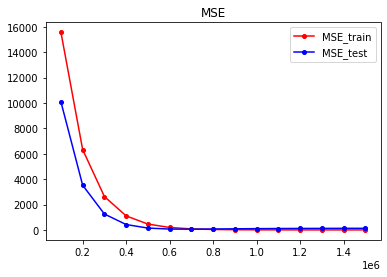

In [109]:
xx = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000]
plt.plot(xx, MSE_train,color = 'red',marker='o',markersize=4, label='MSE_train')
plt.plot(xx,MSE_test, color = 'blue',marker='o',markersize=4, label= 'MSE_test')
plt.legend()
plt.title("MSE")
plt.savefig('c_MSE.png')

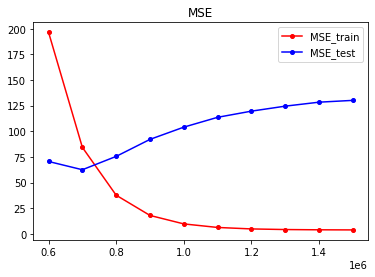

In [108]:
xx = [600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000]
plt.plot(xx, MSE_train[5:],color = 'red',marker='o',markersize=4, label='MSE_train')
plt.plot(xx,MSE_test[5:], color = 'blue',marker='o',markersize=4, label= 'MSE_test')
plt.legend()
plt.title("MSE")
plt.savefig('c_MSE2.png')